In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import numpy as np
import matplotlib.path as mpath

In [ ]:
# Which salinity to use?
# Keep the one with description "Practical salinity of the water body by CTD and computation using UNESCO 1983 algorithm"
# Average values when second sensor is present

# nocal = didn't say calibrated
# notcal = said not calibrated
# - Merge cal1 and cal2 and merge nocal1 and nocal2. Merge overall (cal1+cal2) and (nocal1+nocal2); if conflict, use cal1+cal2; if none present use notcal1+notcal2

# Confirm: convert ng/L to ug/L
# - yes; careful of chl_a that has units of mg/m^3 while everything else is ng/L

# TODO: Nitrate + nitrite
# - Hannah is checking; just skip that col for now


In [38]:
# - answers: lookup CAS for hplc pigments given in metadata, 
# C2MEHPCU add the two columns given into hplc_chl_c2_mgdg
# average the two sensors for TEMPCU01 and TEMPCU02
# use whichever TEMP column is given. if multiple, average them (two sensors)
# for DOXY use calibrated if possible, otherwise use whats given

amt_hplc_sql = {"Cruise": "cruise",
            "Latitude[deg+veN]": "latitude",
            "Longitude[deg+veE]": "longitude",
            "yyyy-mm-ddThh24:mi:ss[GMT]": "timestamp",
            "Bot_depth[metres]": "depth",
            "ABCRHPP1[ng/l]": "hplc_alpha_beta_car",
            "ALLOHPP1[ng/l]": "hplc_allo",
            "BUTAHPP1[ng/l]": "hplc_but_fuco",
            "C1C2HPP1[ng/l]": "hplc_chl_c12",
            "C2MEHPC1[ng/l]": "hplc_chl_c2_mgdg_14",
            "C2MEHPE1[ng/l]": "hplc_chl_c2_mgdg_18",
            "CHLBHPP1[ng/l]": "hplc_tot_chl_b",
            "CHLCHPP1[ng/l]": "hplc_tot_chl_c",
            "CPHLFLP1[mg/m^3]": "chl_a_fluor", 
            "CPHLHPP1[ng/l]": "hplc_tot_chl_a",
            "CLC3HPP1[ng/l]": "hplc_chl_c3",
            "DIADHPP1[ng/l]": "hplc_diadino",
            "DIATHPP1[ng/l]": "hplc_diato",
            "DVCAHPP1[ng/l]": "hplc_dv_chl_a",
            "DVCBHPP1[ng/l]": "hplc_dv_chl_b",
            "FUCXHPP1[ng/l]": "hplc_fuco",
            "GDHPLC01[ng/l]": "hplc_gyro",
            "HEXOHPP1[ng/l]": "hplc_hex_fuco",
            "LUTNHPP1[ng/l]": "hplc_lut",
            "MVC3HPP1[ng/l]": "hplc_mv_chl_c3",
            "MVACHPP1[ng/l]": "hplc_mv_chl_a",
            "NEOXHPP1[ng/l]": "hplc_neo",
            "PBAXHPP1[ng/l]": "hplc_phide_a",
            "PBBXHPP1[ng/l]": "hplc_phide_b",
            "PTAXHPP1[ng/l]": "hplc_phytin_a",
            "PTBXHPP1[ng/l]": "hplc_phytin_b",
            "PYPTHPP1[ng/l]": "hplc_pyrophaeo_a",
            "PERIHPP1[ng/l]": "hplc_perid",
            "PRSXHPP1[ng/l]": "hplc_pras",
            "VILXHPP1[ng/l]": "hplc_viola",
            "ZEOXHPP1[ng/l]": "hplc_zea"}

In [39]:
amt_hplc = pd.read_csv("../../data/datasets/unmodified/amt/amt_hplc.csv")
amt_hplc

,Cruise,BODC_stn,Orig_stn,ODV_type,Gear,Latitude[deg+veN],Longitude[deg+veE],W_depth[metres],yyyy-mm-ddThh24:mi:ss[GMT],Site,...,VINESDP1[ng/l],QV:BODC.113,ZELUHPP1[ng/l],QV:BODC.114,ZELUSDP1[ng/l],QV:BODC.115,ZEOXHPP1[ng/l],QV:BODC.116,ZEOXSDP1[ng/l],QV:BODC.117
0,AMT1,1502343,CTD03,b,CTD,47.0132,-19.9849,,27/09/1995 11:00,-,...,NaN,N,NaN,N,NaN,N,47.08,,NaN,N
1,AMT1,1502343,CTD03,b,CTD,47.0132,-19.9849,,27/09/1995 11:00,-,...,NaN,N,NaN,N,NaN,N,39.70,,NaN,N
2,AMT1,1502343,CTD03,b,CTD,47.0132,-19.9849,,27/09/1995 11:00,-,...,NaN,N,NaN,N,NaN,N,54.36,,NaN,N
3,AMT1,1502343,CTD03,b,CTD,47.0132,-19.9849,,27/09/1995 11:00,-,...,NaN,N,NaN,N,NaN,N,38.93,,NaN,N
4,AMT1,1502343,CTD03,b,CTD,47.0132,-19.9849,,27/09/1995 11:00,-,...,NaN,N,NaN,N,NaN,N,30.27,,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6559,JR16001,1978140,UWAY_HPLC_81,b,GPUMP,-53.0224,-44.9937,2187.2,01/11/2016 04:47,-,...,NaN,N,NaN,N,NaN,N,7.39,,NaN,N
6560,JR16001,1978147,UWAY_HPLC_82,b,GPUMP,-52.8357,-46.7724,2787.6,01/11/2016 13:28,-,...,NaN,N,NaN,N,NaN,N,2.91,,NaN,N
6561,JR16001,1978553,ESA_HPLC_38,b,GPUMP,-52.8256,-46.8681,2798.9,01/11/2016 13:50,-,...,NaN,N,NaN,N,NaN,N,1.67,,NaN,N
6562,JR16001,1978154,UWAY_HPLC_83,b,GPUMP,-52.2476,-52.2411,2508.6,02/11/2016 10:36,-,...,NaN,N,NaN,N,NaN,N,10.16,,NaN,N


In [40]:
amt_hplc.columns.values

array(['Cruise', 'BODC_stn', 'Orig_stn', 'ODV_type', 'Gear',
       'Latitude[deg+veN]', 'Longitude[deg+veE]', 'W_depth[metres]',
       'yyyy-mm-ddThh24:mi:ss[GMT]', 'Site', 'Bot_depth[metres]',
       'Bot_press[db]', 'BODC_bot', 'Bot_Flag', 'Rosette_Pos',
       'Firing_Seq', 'Bot_Ref', 'ABCRHPP1[ng/l]', 'QV:BODC',
       'ABCRSDP1[ng/l]', 'QV:BODC.1', 'ALLOHPP1[ng/l]', 'QV:BODC.2',
       'ALLOSDP1[ng/l]', 'QV:BODC.3', 'ANTHHPP1[ng/l]', 'QV:BODC.4',
       'ANTHSDP1[ng/l]', 'QV:BODC.5', 'ASTAXHP1[ng/l]', 'QV:BODC.6',
       'ASTAXHSD[ng/l]', 'QV:BODC.7', 'BBCAHPP1[ng/l]', 'QV:BODC.8',
       'BBCASDP1[ng/l]', 'QV:BODC.9', 'BECAHPP1[ng/l]', 'QV:BODC.10',
       'BECASDP1[ng/l]', 'QV:BODC.11', 'BUTAHPP1[ng/l]', 'QV:BODC.12',
       'BUTASDP1[ng/l]', 'QV:BODC.13', 'C1C2HPP1[ng/l]', 'QV:BODC.14',
       'C1C2SDP1[ng/l]', 'QV:BODC.15', 'C2MEHPC1[ng/l]', 'QV:BODC.16',
       'C2MEHPCU[ng/l]', 'QV:BODC.17', 'C2MEHPE1[ng/l]', 'QV:BODC.18',
       'C2MEHUCU[ng/l]', 'QV:BODC.19', 'C2MEHUE1[n

In [41]:
# Remove pigment columns that are all nan
amt_hplc = amt_hplc.replace("N", pd.NaT).replace(" ", pd.NaT)
amt_hplc = amt_hplc.dropna(axis=1, how="all")
# only keep latitude <= -30

# amt_hplc = amt_hplc[amt_hplc["Latitude[deg+veN]"] <= -30]

# Get all columns that have ng/L in the name
a_ng = amt_hplc.filter(regex="ng/l", axis=1)
a_ug = a_ng.div(1000)
amt_hplc[a_ug.columns] = a_ug
amt_hplc = amt_hplc.rename(columns=amt_hplc_sql)
amt_hplc


,cruise,BODC_stn,Orig_stn,ODV_type,Gear,latitude,longitude,W_depth[metres],timestamp,Site,...,QV:BODC.110,VILXSDP1[ng/l],VINEHPP1[ng/l],QV:BODC.112,VINESDP1[ng/l],ZELUHPP1[ng/l],ZELUSDP1[ng/l],hplc_zea,QV:BODC.116,ZEOXSDP1[ng/l]
89,AMT1,1502361,CTD21,b,CTD,-30.2901,-43.3895,3817.8,16/10/1995 15:19,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05580,NaN,NaN
90,AMT1,1502361,CTD21,b,CTD,-30.2901,-43.3895,3817.8,16/10/1995 15:19,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07104,NaN,NaN
91,AMT1,1502361,CTD21,b,CTD,-30.2901,-43.3895,3817.8,16/10/1995 15:19,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05630,NaN,NaN
92,AMT1,1502361,CTD21,b,CTD,-30.2901,-43.3895,3817.8,16/10/1995 15:19,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04434,NaN,NaN
93,AMT1,1502361,CTD21,b,CTD,-30.2901,-43.3895,3817.8,16/10/1995 15:19,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01911,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6559,JR16001,1978140,UWAY_HPLC_81,b,GPUMP,-53.0224,-44.9937,2187.2,01/11/2016 04:47,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00739,NaN,NaN
6560,JR16001,1978147,UWAY_HPLC_82,b,GPUMP,-52.8357,-46.7724,2787.6,01/11/2016 13:28,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00291,NaN,NaN
6561,JR16001,1978553,ESA_HPLC_38,b,GPUMP,-52.8256,-46.8681,2798.9,01/11/2016 13:50,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00167,NaN,NaN
6562,JR16001,1978154,UWAY_HPLC_83,b,GPUMP,-52.2476,-52.2411,2508.6,02/11/2016 10:36,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01016,NaN,NaN


In [42]:
amt_other_sql = {"Cruise": "cruise",
            "Latitude[deg+veN]": "latitude",
            "Longitude[deg+veE]": "longitude",
            "yyyy-mm-ddThh24:mi:ss[GMT]": "timestamp",
            "Bot_depth[metres]": "depth",
            "TEMPST01": "temperature",
            "MDMAP014": "tot_alkalinity",
            "CORGCAP1": "poc",
            "NTRIAATX": "nitrite",
            "NTRZAATX": "nitrate_nitrite",
            "PHOSAATX": "phosphate",
            "SLCAAATX": "silicate"}

In [43]:
amt_other = pd.read_csv("../../data/datasets/unmodified/amt/amt_other.csv")

In [44]:
#TODO: figure out which nitrate+nitrite column to use
#TODO: add logic for choosing which doxy col to use
#TODO: for nitrate prioritize GFF filtration, then no flitration, then unknown
amt_other = amt_other[amt_other["Latitude[deg+veN]"] <= -30]
amt_other = amt_other.rename(columns=amt_other_sql)
amt_other.columns.values

array(['cruise', 'BODC_stn', 'Orig_stn', 'ODV_type', 'Gear', 'latitude',
       'longitude', 'W_depth[metres]', 'timestamp', 'Site', 'depth',
       'Bot_press[db]', 'BODC_bot', 'Bot_Flag', 'Rosette_Pos',
       'Firing_Seq', 'Bot_Ref', 'ALKYPOTK[umol/kg]', 'QV:BODC',
       'ALSDPOTK[umol/kg]', 'QV:BODC.1', 'CCA17035[umol/l]', 'QV:BODC.2',
       'CINGFA04[umol/l]', 'QV:BODC.3', 'CORGCAP1[umol/l]', 'QV:BODC.4',
       'CORGCOF1[umol/l]', 'QV:BODC.5', 'CORGUVD2[umol/l]', 'QV:BODC.6',
       'DFEFICHL[nmol/l]', 'QV:BODC.7', 'DFEFICSD[nmol/l]', 'QV:BODC.8',
       'DOKGWITX[umol/kg]', 'QV:BODC.9', 'DOXYSC01[umol/l]', 'QV:BODC.10',
       'DOXYSU01[umol/l]', 'QV:BODC.11', 'DOXYSU02[umol/l]', 'QV:BODC.12',
       'DOXYWITX[umol/l]', 'QV:BODC.13', 'DWIRPP01[W/m^2]', 'QV:BODC.14',
       'FESDCLDX[nmol/l]', 'QV:BODC.15', 'FEXXCLDX[nmol/l]', 'QV:BODC.16',
       'IRRDPP01[uE/m^2/s]', 'QV:BODC.17', 'IRRDSD01[uE/m^2/s]',
       'QV:BODC.18', 'IRRDUV01[uE/m^2/s]', 'QV:BODC.19',
       'IRRUPP01[

In [30]:
# TODO: do we want to store amt microscopy data? go over the format in html
# for biomass cols divide by 1000
# abundance is count per L
amt_micro_r = pd.read_csv("../../data/datasets/unmodified/amt/amt_microphyto.csv")

In [31]:
amt_micro_r.columns

Index(['Cruise', 'BODC_stn', 'Orig_stn', 'ODV_type', 'Gear',
       'Latitude[deg+veN]', 'Longitude[deg+veE]', 'W_depth[metres]',
       'yyyy-mm-ddThh24:mi:ss[GMT]', 'Site',
       ...
       'W3291431[#/ml]', 'QV:BODC.237', 'WA006877[#/ml]', 'QV:BODC.238',
       'X2827BB0[#/ml]', 'QV:BODC.239', 'XA130594[#/ml]', 'QV:BODC.240',
       'XAA60639[mg/m^3]', 'QV:BODC.241'],
      dtype='object', length=501)

In [32]:
# create two melts, one with abundance and one with biomass
# then join them together
abundance_cols = [s for s in amt_micro_r.columns if "#/ml" in s]
abd = amt_micro_r.melt(id_vars=amt_micro_r.columns[:17], ignore_index=False, value_vars=abundance_cols, var_name="taxa", value_name="count_per_L")
abd = abd.dropna(subset=["count_per_L"])
# we melted the abundance cols, now melt the biomass cols
biomass_cols = [s for s in amt_micro_r.columns if "mg/m^3" in s]
biomass = amt_micro_r.melt(id_vars=amt_micro_r.columns[:17], value_vars=biomass_cols, var_name="taxa", ignore_index=False, value_name="biomass_per_L")
biomass = biomass.dropna(subset=["biomass_per_L"])
# join the two melted dfs by index
amt_biomass_to_abundance = {"M225B210[mg/m^3]": "P985M00Z[#/ml]", "RB6272A6[mg/m^3]": "P861M00Z[#/ml]", "S7338A30[mg/m^3]": "P500M17Z[#/ml]", "XAA60639[mg/m^3]": "P968M00Z[#/ml]"}
# rename data in the taxa col using the dict above
biomass["taxa"] = biomass["taxa"].replace(amt_biomass_to_abundance)
amt_micro = abd.merge(biomass, suffixes=(None, "_y"), how="left", on=["taxa", "Latitude[deg+veN]", "Longitude[deg+veE]", "yyyy-mm-ddThh24:mi:ss[GMT]", "Bot_depth[metres]", "Cruise"])
amt_micro = amt_micro.loc[:,~amt_micro.columns.str.endswith("_y")]
# TODO: unit conversions (mL to L)
amt_micro

,Cruise,BODC_stn,Orig_stn,ODV_type,Gear,Latitude[deg+veN],Longitude[deg+veE],W_depth[metres],yyyy-mm-ddThh24:mi:ss[GMT],Site,Bot_depth[metres],Bot_press[db],BODC_bot,Bot_Flag,Rosette_Pos,Firing_Seq,Bot_Ref,taxa,count_per_L,biomass_per_L
0,AMT1,1502344,CTD04,b,CTD,42.2547,-20.0313,,28/09/1995 13:39,-,8.0,8.1,501667,0,,,,A8308246[#/ml],0.0,NaN
1,AMT1,1502344,CTD04,b,CTD,42.2547,-20.0313,,28/09/1995 13:39,-,61.4,61.9,501664,0,,,,A8308246[#/ml],0.0,NaN
2,AMT1,1502345,CTD05,b,CTD,37.9106,-19.9905,,29/09/1995 13:24,-,7.7,7.8,501675,0,,,,A8308246[#/ml],0.0,NaN
3,AMT1,1502345,CTD05,b,CTD,37.9106,-19.9905,,29/09/1995 13:24,-,89.8,90.5,501671,0,,,,A8308246[#/ml],0.0,NaN
4,AMT1,1502346,CTD06,b,CTD,33.5971,-20.8778,,30/09/1995 13:25,-,6.9,6.9,501681,0,,,,A8308246[#/ml],0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11990,AMT1,1502363,CTD23,b,CTD,-40.9514,-55.2599,3475.8,22/10/1995 17:38,-,38.9,39.2,501533,0,,,,XA130594[#/ml],0.0,NaN
11991,AMT1,1502364,CTD24,b,CTD,-46.0080,-56.2836,5089.3,23/10/1995 16:22,-,6.9,7.0,501544,0,,,,XA130594[#/ml],0.0,NaN
11992,AMT1,1502364,CTD24,b,CTD,-46.0080,-56.2836,5089.3,23/10/1995 16:22,-,38.9,39.2,501541,0,,,,XA130594[#/ml],0.0,NaN
11993,AMT1,1502365,CTD25,b,CTD,-50.8081,-57.4196,133.4,24/10/1995 14:18,-,7.0,7.1,501552,0,,,,XA130594[#/ml],0.0,NaN


In [32]:
amt_other

,cruise,BODC_stn,Orig_stn,ODV_type,Gear,latitude,longitude,W_depth[metres],timestamp,Site,...,TEMPSD03[degC],QV:BODC.87,TEMPSD04[degC],QV:BODC.88,TEMPST01[degC],QV:BODC.89,TEMPST02[degC],QV:BODC.90,UWIRPP01[W/m^2],QV:BODC.91
162,AMT1,1502361,CTD21,b,CTD,-30.2901,-43.3895,3817.8,16/10/1995 15:19,-,...,NaN,N,NaN,N,19.244,,NaN,N,NaN,N
163,AMT1,1502361,CTD21,b,CTD,-30.2901,-43.3895,3817.8,16/10/1995 15:19,-,...,NaN,N,NaN,N,19.120,,NaN,N,NaN,N
164,AMT1,1502361,CTD21,b,CTD,-30.2901,-43.3895,3817.8,16/10/1995 15:19,-,...,NaN,N,NaN,N,19.117,,NaN,N,NaN,N
165,AMT1,1502361,CTD21,b,CTD,-30.2901,-43.3895,3817.8,16/10/1995 15:19,-,...,NaN,N,NaN,N,19.130,,NaN,N,NaN,N
166,AMT1,1502361,CTD21,b,CTD,-30.2901,-43.3895,3817.8,16/10/1995 15:19,-,...,NaN,N,NaN,N,19.110,,NaN,N,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27302,JR20131005,1692708,CTD065,b,CTD,-46.2713,-50.7457,6021,06/11/2013 14:13,-,...,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N
27303,JR20131005,1692708,CTD065,b,CTD,-46.2713,-50.7457,6021,06/11/2013 14:13,-,...,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N
27304,JR20131005,1693401,sal084,b,GPUMP,-48.0774,-52.9063,3643.2,07/11/2013 06:42,-,...,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N
27305,JR20131005,1693408,sal085,b,GPUMP,-48.6836,-53.6938,5060.5,07/11/2013 11:44,-,...,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N


In [ ]:
# do a join with amt_micro to where micro has the matching id's to the sample row
# build where it uses a cache of worms
# --force_rebuild actually queries worms again to get the latest data

In [45]:
# TODO: join them all together into one
# join hplc and other
amt = amt_other.merge(amt_hplc, how="left", on=["cruise", "latitude", "longitude", "timestamp", "depth"])
amt = amt.loc[:,~amt.columns.str.endswith("_x")]

# amt = amt_hplc
amt["hpcl_present"] = 1
amt["chemtax_present"] = 0
amt["microscopy_present"] = 1
amt["source"] = "amt"
amt

,cruise,latitude,longitude,timestamp,depth,ALKYPOTK[umol/kg],ALSDPOTK[umol/kg],QV:BODC.1,CCA17035[umol/l],CINGFA04[umol/l],...,VINESDP1[ng/l],ZELUHPP1[ng/l],ZELUSDP1[ng/l],hplc_zea,QV:BODC.116,ZEOXSDP1[ng/l],hpcl_present,chemtax_present,microscopy_present,source
0,AMT1,-30.2901,-43.3895,16/10/1995 15:19,7.2,NaN,NaN,N,NaN,NaN,...,NaN,NaN,NaN,0.05580,NaN,NaN,1,0,1,amt
1,AMT1,-30.2901,-43.3895,16/10/1995 15:19,49.9,NaN,NaN,N,NaN,NaN,...,NaN,NaN,NaN,0.07104,NaN,NaN,1,0,1,amt
2,AMT1,-30.2901,-43.3895,16/10/1995 15:19,78.5,NaN,NaN,N,NaN,NaN,...,NaN,NaN,NaN,0.05630,NaN,NaN,1,0,1,amt
3,AMT1,-30.2901,-43.3895,16/10/1995 15:19,89.4,NaN,NaN,N,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,amt
4,AMT1,-30.2901,-43.3895,16/10/1995 15:19,99.1,NaN,NaN,N,NaN,NaN,...,NaN,NaN,NaN,0.04434,NaN,NaN,1,0,1,amt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4622,JR20131005,-46.2713,-50.7457,06/11/2013 14:13,405.4,NaN,NaN,N,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,amt
4623,JR20131005,-46.2713,-50.7457,06/11/2013 14:13,508.3,NaN,NaN,N,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,amt
4624,JR20131005,-48.0774,-52.9063,07/11/2013 06:42,6.0,NaN,NaN,N,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,amt
4625,JR20131005,-48.6836,-53.6938,07/11/2013 11:44,6.0,NaN,NaN,N,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,amt


In [46]:
amt.to_csv("../../data/datasets/modified/amt/amt_sample.csv", index=False)

In [18]:
amt_other

,cruise,BODC_stn,Orig_stn,ODV_type,Gear,latitude,longitude,W_depth[metres],timestamp,Site,...,TEMPSD03[degC],QV:BODC.87,TEMPSD04[degC],QV:BODC.88,TEMPST01[degC],QV:BODC.89,TEMPST02[degC],QV:BODC.90,UWIRPP01[W/m^2],QV:BODC.91
0,AMT1,1502341,CTD01,b,CTD,48.9312,-9.1461,,25/09/1995 12:46,-,...,NaN,N,NaN,N,16.654,,NaN,N,NaN,N
1,AMT1,1502341,CTD01,b,CTD,48.9312,-9.1461,,25/09/1995 12:46,-,...,NaN,N,NaN,N,16.625,,NaN,N,NaN,N
2,AMT1,1502341,CTD01,b,CTD,48.9312,-9.1461,,25/09/1995 12:46,-,...,NaN,N,NaN,N,16.589,,NaN,N,NaN,N
3,AMT1,1502341,CTD01,b,CTD,48.9312,-9.1461,,25/09/1995 12:46,-,...,NaN,N,NaN,N,16.576,,NaN,N,NaN,N
4,AMT1,1502341,CTD01,b,CTD,48.9312,-9.1461,,25/09/1995 12:46,-,...,NaN,N,NaN,N,12.152,,NaN,N,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27302,JR20131005,1692708,CTD065,b,CTD,-46.2713,-50.7457,6021,06/11/2013 14:13,-,...,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N
27303,JR20131005,1692708,CTD065,b,CTD,-46.2713,-50.7457,6021,06/11/2013 14:13,-,...,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N
27304,JR20131005,1693401,sal084,b,GPUMP,-48.0774,-52.9063,3643.2,07/11/2013 06:42,-,...,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N
27305,JR20131005,1693408,sal085,b,GPUMP,-48.6836,-53.6938,5060.5,07/11/2013 11:44,-,...,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N


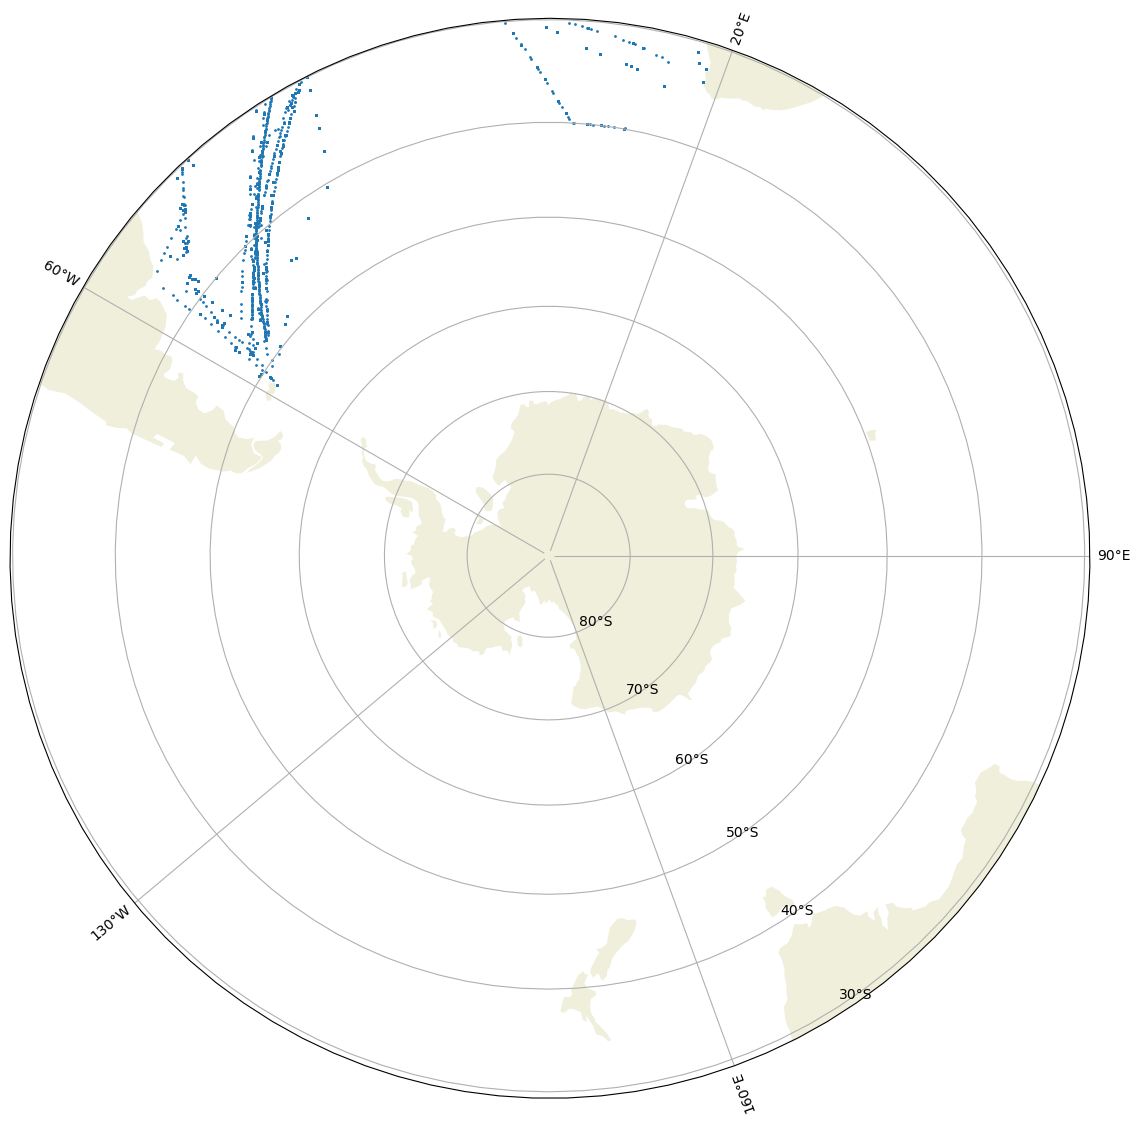

In [35]:
def so_map_ax() -> plt.axes:
    map_proj = ccrs.SouthPolarStereo()
    fig = plt.figure(figsize=[12, 12])  # inches
    ax = plt.subplot(projection=map_proj)
    ax.set_extent([-180, 180, -90, -29.4], ccrs.PlateCarree())
    fig.subplots_adjust(bottom=0.05, top=0.95, left=0.04, right=0.95, wspace=0.02)
    ax.add_feature(cartopy.feature.LAND)
    ax.gridlines(xlocs=[-130, -60, 20, 90, 160], draw_labels=True)
    theta  = np.linspace(0, 2 * np.pi, 100)
    center, radius = [0.5, 0.5], 0.5  ## could use 0.45 here, as Simon Thomas did
    verts  = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform = ax.transAxes)
    return ax

# plot the amt points on the SO map
amt_map = so_map_ax()
amt_map.scatter(amt.longitude, amt.latitude, transform=ccrs.PlateCarree(), s=1)

In [16]:
# b[["NTRZAAD1[umol/l]", "NTRZAATX[umol/l]"]].dropna().values
# Find the count of rows where we have one or the other (not both)
((b["NTRZAAD1[umol/l]"].notna()) ^ (b["NTRZAATX[umol/l]"].notna())).sum()

13946

In [18]:
b["NTRZAAD1[umol/l]"].notna().sum()

159

In [19]:
b["NTRZAATX[umol/l]"].notna().sum()

14003

In [25]:
b["NTRZLWTX[umol/l]"].notna().sum()

1607